In [1]:
!pip install pandas
!pip install sodapy

In [2]:
import pandas as pd
from sodapy import Socrata

In [3]:
client = Socrata("data.cityofchicago.org", None)

results = client.get('m6dm-c72p', limit=1000)
results_df = pd.DataFrame.from_records(results)
results_df

,trip_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,...,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,pickup_centroid_location,dropoff_centroid_latitude,dropoff_centroid_longitude,dropoff_centroid_location
0,07bf97e94038b1c4f8efcf563d5687301a3ed988,2018-12-07T04:00:00.000,2018-12-07T04:15:00.000,403,0.67237118291678,17031320400,17031839100,32,32,5,...,2.5,7.5,False,1,41.8774061234,-87.6219716519,"{'type': 'Point', 'coordinates': [-87.62197165...",41.8809944707,-87.6327464887,"{'type': 'Point', 'coordinates': [-87.63274648..."
1,07bf98c6d5b3e6b1cbd175fc6e66be97f4501f5e,2018-12-03T22:30:00.000,2018-12-03T22:45:00.000,1135,9.01973752920964,NaN,NaN,28,69,5,...,2.5,10.5,True,3,41.874005383,-87.6635175498,"{'type': 'Point', 'coordinates': [-87.66351754...",41.7632467988,-87.6161341112,"{'type': 'Point', 'coordinates': [-87.61613411..."
2,07bf998b11f90483feeab197861f875ec9a12d8f,2018-11-06T09:45:00.000,2018-11-06T10:00:00.000,790,1.15630141945148,17031081300,17031081403,8,8,10,...,2.8,12.8,False,1,41.8983317935,-87.6207628651,"{'type': 'Point', 'coordinates': [-87.62076286...",41.8909220259,-87.6188683546,"{'type': 'Point', 'coordinates': [-87.61886835..."
3,01d7041ee1c646490be83b7062a187e40826070b,2019-09-27T21:15:00.000,2019-09-27T21:15:00.000,234,0.530202,17031081800,17031081700,8,8,2.5,...,2.55,5.05,False,1,41.8932163595,-87.6378442095,"{'type': 'Point', 'coordinates': [-87.63784420...",41.8920421365,-87.6318639497,"{'type': 'Point', 'coordinates': [-87.63186394..."
4,07bf9a8f9125164a60d3becb21a8f4b054fb977e,2018-12-10T21:30:00.000,2018-12-10T21:45:00.000,585,2.07258217876555,17031030800,17031031700,77,3,5,...,2.5,7.5,False,1,41.9799124453,-87.6641882421,"{'type': 'Point', 'coordinates': [-87.66418824...",41.9654457842,-87.6631958495,"{'type': 'Point', 'coordinates': [-87.66319584..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,07c3a492f749d9da31d448440b6cda6f4a74a0eb,2018-11-25T14:45:00.000,2018-11-25T15:00:00.000,782,2.886624194079,17031831100,17031831900,21,6,7.5,...,2.5,10,False,1,41.942859303,-87.717503858,"{'type': 'Point', 'coordinates': [-87.71750385...",41.9451704528,-87.6687944391,"{'type': 'Point', 'coordinates': [-87.66879443..."
996,07c3a64644421918283c552b49a199ce1a6dd776,2018-11-12T21:00:00.000,2018-11-12T21:15:00.000,1155,5.27997152321108,NaN,NaN,65,71,10,...,2.5,12.5,True,2,41.7697780588,-87.7269298425,"{'type': 'Point', 'coordinates': [-87.72692984...",41.7442051463,-87.6563059862,"{'type': 'Point', 'coordinates': [-87.65630598..."
997,07c3a7ba685531235fe4c6155a06392ca97700bb,2018-11-14T23:30:00.000,2018-11-15T00:00:00.000,1598,6.17706779228951,NaN,NaN,31,63,7.5,...,2.5,10,True,3,41.8502663663,-87.667569312,"{'type': 'Point', 'coordinates': [-87.66756931...",41.795430631,-87.6964352325,"{'type': 'Point', 'coordinates': [-87.69643523..."
998,07c3a90de0ac9ebd5449471c8a7eaa6b32e61b92,2018-12-02T09:45:00.000,2018-12-02T10:15:00.000,1429,17.8944597499322,NaN,17031430800,NaN,43,22.5,...,2.5,25,False,1,NaN,NaN,NaN,41.7607504457,-87.571298655,"{'type': 'Point', 'coordinates': [-87.57129865..."


In [6]:
results_df.columns

Index(['trip_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
       'pickup_community_area', 'dropoff_community_area', 'fare', 'tip',
       'additional_charges', 'trip_total', 'shared_trip_authorized',
       'trips_pooled', 'pickup_centroid_latitude', 'pickup_centroid_longitude',
       'pickup_centroid_location', 'dropoff_centroid_latitude',
       'dropoff_centroid_longitude', 'dropoff_centroid_location'],
      dtype='object')

<Axes: ylabel='Frequency'>

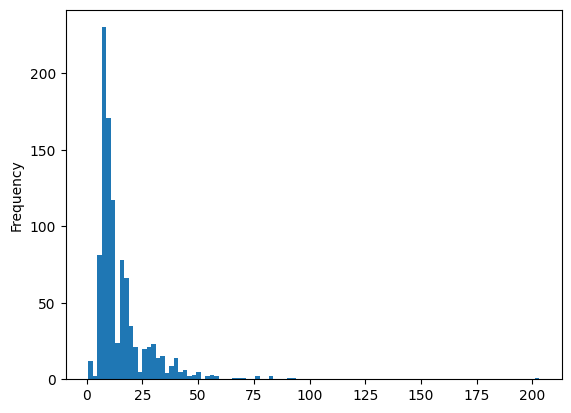

In [11]:
results_df['trip_total'].astype('float').plot.hist(bins=100)

In [17]:
pd.to_numeric(results_df['trip_total']).mean()

15.36416

In [22]:
pd.to_numeric(results_df[pd.to_datetime(results_df['trip_end_timestamp']).dt.year == 2018]['trip_total']).mean()

14.250252525252527

In [23]:
pd.to_numeric(results_df[pd.to_datetime(results_df['trip_end_timestamp']).dt.year == 2019]['trip_total']).mean()

16.762025000000005

In [24]:
pd.to_numeric(results_df[pd.to_datetime(results_df['trip_end_timestamp']).dt.year == 2020]['trip_total']).mean()

10.58

In [27]:
pd.to_numeric(results_df[pd.to_datetime(results_df['trip_end_timestamp']).dt.year == 2022]['trip_total']).mean()

43.385000000000005

In [30]:
(pd.to_datetime(results_df['trip_end_timestamp']).dt.year == 2022).sum()

4

In [31]:
(pd.to_datetime(results_df['trip_end_timestamp']).dt.year == 2021).sum()

0

In [32]:
results_df['trips_pooled']

0      1
1      3
2      1
3      1
4      1
      ..
995    1
996    2
997    3
998    1
999    1
Name: trips_pooled, Length: 1000, dtype: object

In [34]:
results_df.columns

Index(['trip_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
       'pickup_community_area', 'dropoff_community_area', 'fare', 'tip',
       'additional_charges', 'trip_total', 'shared_trip_authorized',
       'trips_pooled', 'pickup_centroid_latitude', 'pickup_centroid_longitude',
       'pickup_centroid_location', 'dropoff_centroid_latitude',
       'dropoff_centroid_longitude', 'dropoff_centroid_location'],
      dtype='object')

In [35]:
results_df['pickup_community_area']

0       32
1       28
2        8
3        8
4       77
      ... 
995     21
996     65
997     31
998    NaN
999     76
Name: pickup_community_area, Length: 1000, dtype: object

In [36]:


results = client.get('kf7e-cur8', limit=1000)
congestion = pd.DataFrame.from_records(results)
congestion

,time,region_id,speed,region,bus_count,num_reads,hour,day_of_week,month,description,record_id,west,east,south,north,nw_location,se_location,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_43wa_7qmu
0,2018-03-31T14:40:28.000,2,27.95,Far North West,25,493,14,7,3,North of Montrose. East River to Cicero,02-201803311940,-87.84621,-87.747456,41.960669,42.0190998,"{'type': 'Point', 'coordinates': [-87.84621, 4...","{'type': 'Point', 'coordinates': [-87.747456, ...",9012,NaN,NaN
1,2018-03-31T14:40:28.000,3,19.09,North Park-Albany-Linconl Sq,48,834,14,7,3,Montrose to Devon. Cicero to Ravenswood,03-201803311940,-87.747456,-87.67459,41.960669,41.997946,"{'type': 'Point', 'coordinates': [-87.747456, ...","{'type': 'Point', 'coordinates': [-87.67459, 4...",4455,NaN,NaN
2,2018-03-31T14:40:28.000,4,18.41,Edge Water-Uptown,36,585,14,7,3,Montrose to Devon. Ravenswood to Lake Shore,04-201803311940,-87.67459,-87.646438,41.960669,41.997946,"{'type': 'Point', 'coordinates': [-87.67459, 4...","{'type': 'Point', 'coordinates': [-87.646438, ...",4451,76,24
3,2018-03-31T14:40:28.000,6,20.45,Irving Park-Avondale-North Ctr,48,811,14,7,3,Diversey to Montrose. Cicero to Ravenswood,06-201803311940,-87.747456,-87.67459,41.931841,41.960669,"{'type': 'Point', 'coordinates': [-87.747456, ...","{'type': 'Point', 'coordinates': [-87.67459, 4...",22618,15,50
4,2018-03-31T14:40:28.000,7,18.41,Hermosa-Logan Square,47,817,14,7,3,North Ave to Diversy. Cicero to Ravenswood,07-201803311940,-87.747456,-87.67459,41.909269,41.931841,"{'type': 'Point', 'coordinates': [-87.747456, ...","{'type': 'Point', 'coordinates': [-87.67459, 4...",22615,19,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2018-03-15T06:40:37.000,8,21.82,Lincoln Park-Lake View,77,1263,6,5,3,North Ave to Montrose. Ravenswood to Lake Shore,08-201803151140,-87.67459,-87.619112,41.910561,41.960669,"{'type': 'Point', 'coordinates': [-87.67459, 4...","{'type': 'Point', 'coordinates': [-87.619112, ...",21186,46,18
996,2018-03-15T06:40:37.000,4,21.14,Edge Water-Uptown,43,613,6,5,3,Montrose to Devon. Ravenswood to Lake Shore,04-201803151140,-87.67459,-87.646438,41.960669,41.997946,"{'type': 'Point', 'coordinates': [-87.67459, 4...","{'type': 'Point', 'coordinates': [-87.646438, ...",4451,76,24
997,2018-03-15T06:40:38.000,19,23.86,New City-Englewood-W Englewood,54,914,6,5,3,71st to Pershing. Western to Steward,19-201803151140,-87.68373,-87.636322,41.764066,41.822792,"{'type': 'Point', 'coordinates': [-87.68373, 4...","{'type': 'Point', 'coordinates': [-87.636322, ...",14924,59,1
998,2018-03-15T06:40:38.000,17,29.32,Midway-Garfield Rdg-Clearing,18,311,6,5,3,71st to Pershing. Halem to Cicero,17-201803151140,-87.802188,-87.747456,41.764066,41.822792,"{'type': 'Point', 'coordinates': [-87.802188, ...","{'type': 'Point', 'coordinates': [-87.747456, ...",26624,NaN,NaN


In [46]:
coords = congestion.loc[1, ["north", "west", "south", "east"]].astype(float).values.reshape(2,2).tolist()

In [47]:
import folium
m = folium.Map(location=(41.925518333333336, -87.64919441624691))
folium.PolyLine(coords, tooltip='Slow Stuff').add_to(m)
m

In [55]:
congestion['speed'] = pd.to_numeric(congestion['speed'])
congestion.groupby('region_id')['speed'].mean()

region_id
1     21.783611
10    20.940000
11    20.050882
12    18.729444
13    16.441714
14    23.056176
15    24.194412
16    27.737188
17    28.235588
18    23.232941
19    24.668000
2     27.408286
20    25.023333
21    24.066765
22    29.256316
23    21.056000
24    23.818235
25    27.496389
26    26.769714
27    29.266471
28    27.007429
29    23.392286
3     20.811176
4     21.360882
5     23.029063
6     21.195588
7     21.274286
8     20.756765
9     22.611143
Name: speed, dtype: float64

In [59]:
!pip install scikit-learn

                                              0.0/11.0 MB ? eta -:--:--
                                              0.0/11.0 MB ? eta -:--:--
                                             0.0/11.0 MB 495.5 kB/s eta 0:00:23
                                             0.1/11.0 MB 901.1 kB/s eta 0:00:13
     -                                        0.4/11.0 MB 2.5 MB/s eta 0:00:05
     ----                                     1.2/11.0 MB 5.6 MB/s eta 0:00:02
     -------------                            3.8/11.0 MB 14.2 MB/s eta 0:00:01
     ------------------------                 6.6/11.0 MB 21.1 MB/s eta 0:00:01
     ---------------------------------        9.3/11.0 MB 25.8 MB/s eta 0:00:01
     --------------------------------------  11.0/11.0 MB 59.5 MB/s eta 0:00:01
     --------------------------------------- 11.0/11.0 MB 50.3 MB/s eta 0:00:00
                                              0.0/44.7 MB ? eta -:--:--
     --                                      3.4/44.7 MB 108.3 MB/

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
from sklearn.model_selection import train_test_split

In [74]:
X = congestion[['region_id', 'hour', 'day_of_week', 'month']]
X['hour'] = pd.to_numeric(X['hour'])
X['day_of_week'] = pd.to_numeric(X['day_of_week'])
X['month'] = pd.to_numeric(X['month'])
y = congestion['speed'].astype('float')

C:\Users\ryanf\AppData\Local\Temp\ipykernel_47864\32073101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['hour'] = pd.to_numeric(X['hour'])
C:\Users\ryanf\AppData\Local\Temp\ipykernel_47864\32073101.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['day_of_week'] = pd.to_numeric(X['day_of_week'])
C:\Users\ryanf\AppData\Local\Temp\ipykernel_47864\32073101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [65]:
enc = OneHotEncoder()
enc.fit(X['region_id'].values.reshape(-1,1))

OneHotEncoder()

In [68]:
from sklearn.compose import ColumnTransformer

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [79]:
ct = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(), ['region_id'])
    ],
    remainder='passthrough'
)
ct.fit_transform(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3599 stored elements and shape (900, 32)>

In [105]:
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
mean_squared_error(y_test, rfr.predict(X_test))

5.539965905733436

In [81]:
rfr.predict(X_test)

array([26.47811603, 28.50364944, 20.82274786, 16.50638   , 30.10356275,
       23.16940111, 20.91254347, 22.50322794, 18.77188   , 33.77424258,
       18.1081    , 21.34106194, 23.2689    , 29.60380611, 22.11689894,
       28.80376929, 22.05098544, 21.16115976, 20.80482845, 23.42427357,
       20.02917837, 28.22597853, 21.89341075, 18.53741905, 23.48678924,
       33.83606432, 21.34570105, 19.05129605, 26.47811603, 22.13984333,
       16.83815563, 21.12124968, 14.29459873, 23.48338117, 26.78477841,
       20.68914016,  4.66235333, 23.04128901, 23.78944156, 28.88430405,
       22.98067782, 18.8691754 , 24.60068566, 24.0238981 , 26.14134633,
       29.19605821, 21.84748774, 21.88795583, 18.8691754 , 22.30152905,
       24.24286917, 28.44823341, 28.09823877, 23.596095  , 14.49850286,
       30.04230345, 16.83815563, 14.29459873, 30.65472755, 19.76221107,
       21.34570105, 29.78359696, 20.80482845, 21.19326858, 20.4210075 ,
       24.24286917, 24.24286917, 10.10068667, 28.92950726, 23.27

In [82]:
from sklearn.metrics import mean_squared_error

In [85]:
mean_squared_error(y_test, [y_test.mean()]*y_test.shape[0])

32.615198559999996

In [106]:
rfr.feature_importances_

array([0.74861216, 0.1809372 , 0.0694416 , 0.00100905])

In [89]:
from sklearn.linear_model import LinearRegression

In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [92]:
mean_squared_error(y_test, lr.predict(X_test))

29.580268189943922

In [93]:
from sklearn.linear_model import Ridge

In [95]:
r = Ridge(alpha=0.1)
r.fit(X_train, y_train)
mean_squared_error(y_test, r.predict(X_test))

29.580197737473295

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
gbr = GradientBoostingRegressor(n_estimators=10_000)
gbr.fit(X_train, y_train)
mean_squared_error(y_test, gbr.predict(X_test))

5.054483524573865